# 🛍️ Walmart Sales Analysis – Advanced Models & Visualizations

In [47]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\DELL\Downloads\Walmart.csv")

print("Shape:", df.shape)
print("Columns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.head()


Shape: (6435, 8)
Columns:
 Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Missing Values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data Types:
 Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


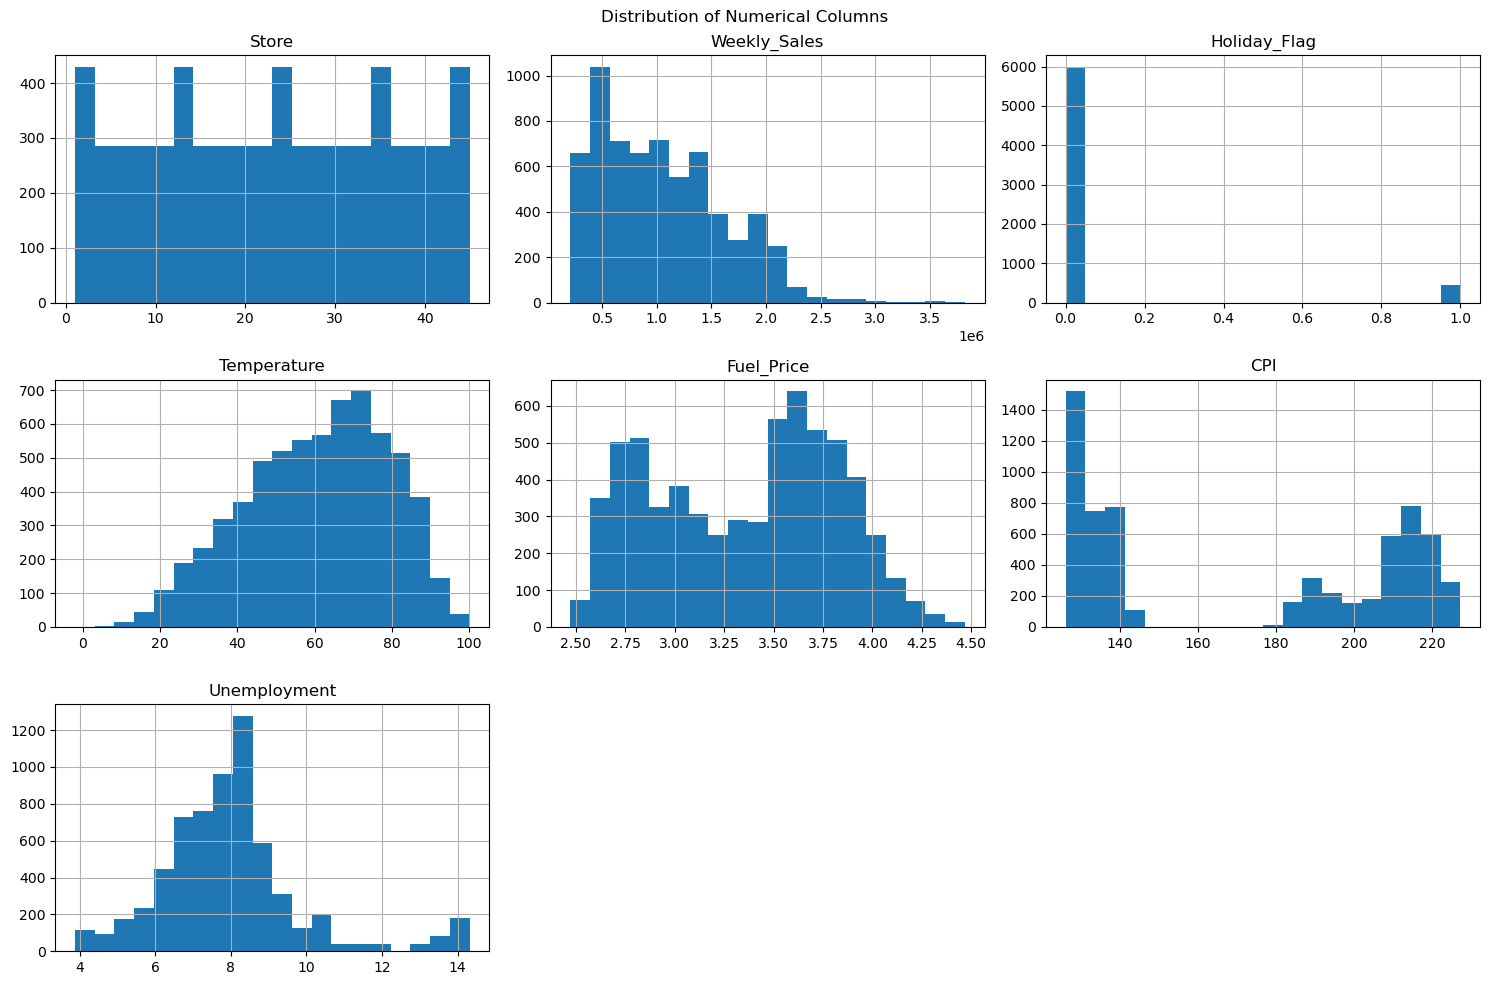

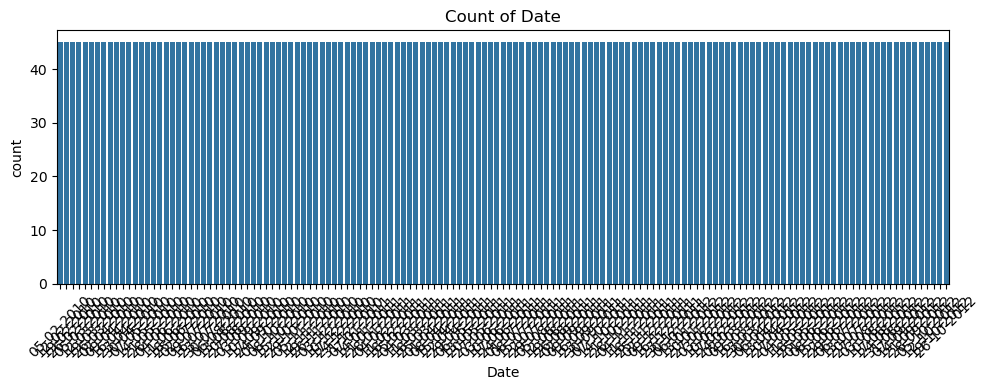

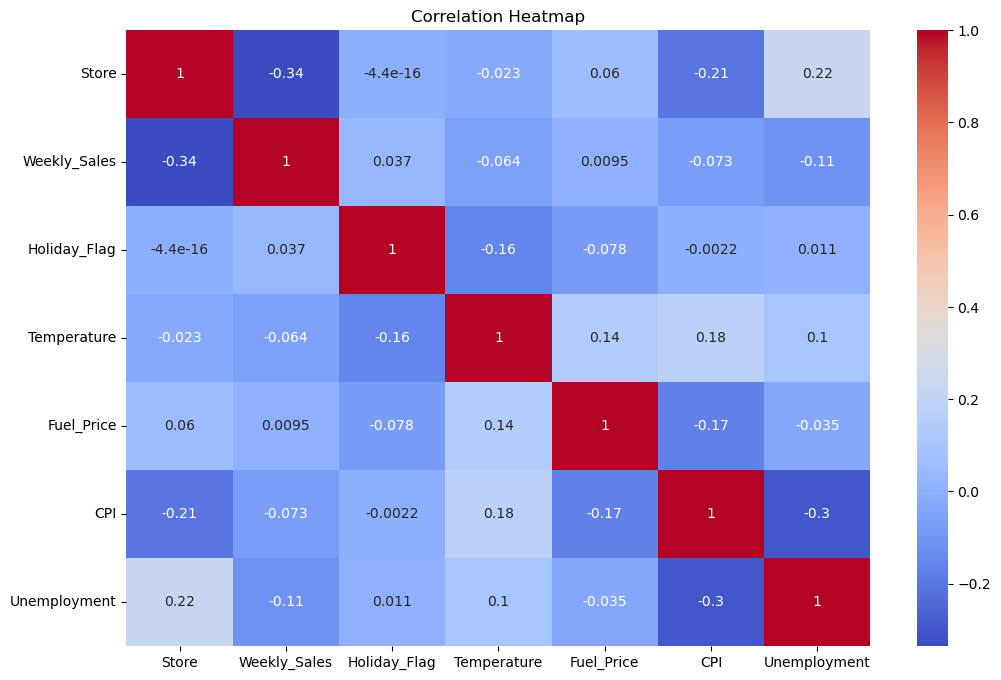

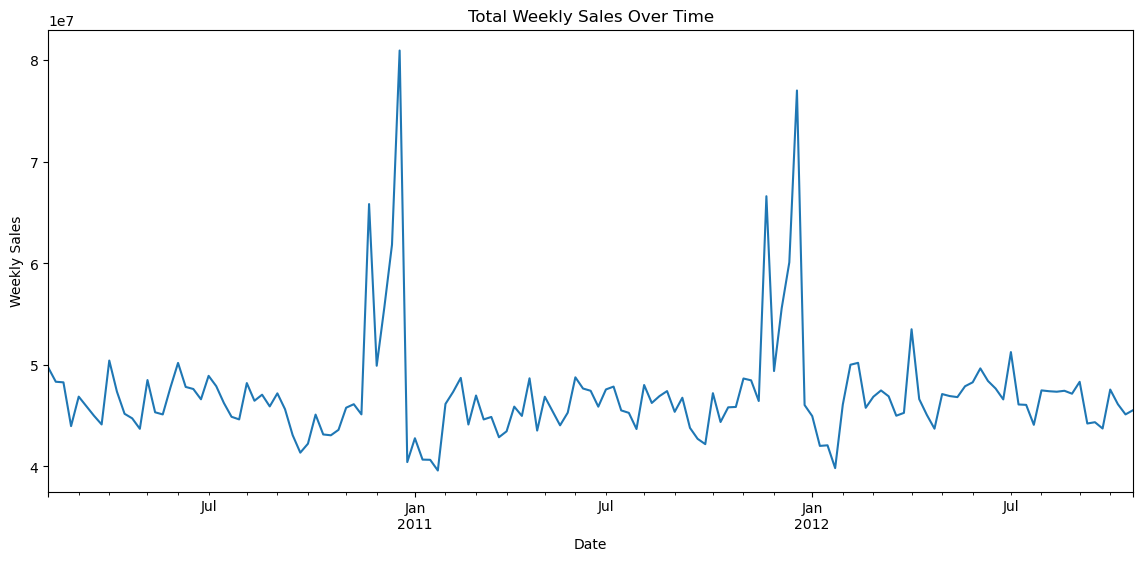

In [59]:

df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Columns")
plt.tight_layout()
plt.show()

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

df['Date'] = pd.to_datetime(df['Date'],dayfirst='true')
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(14, 6), title="Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()


In [70]:

df.fillna(method='ffill', inplace=True)
df['Month'] = df['Date'].dt.month
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Weekly_Sales', axis=1)
y = df_encoded['Weekly_Sales']


In [72]:
X

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,2
1,1,2010-02-12,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,2
4,1,2010-03-05,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-10-05,0,64.89,3.985,192.170412,8.667,10
6432,45,2012-10-12,0,54.47,4.000,192.327265,8.667,10
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,10


In [73]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [74]:
datetime_cols = X.select_dtypes(include=['datetime64']).columns
X_numeric = X.drop(columns=datetime_cols)

In [81]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# VIF
vif_df = pd.DataFrame()
vif_df['features'] = X_numeric.columns
vif_df['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False).head())

# RFE
rfe_model = LinearRegression()
rfe = RFE(rfe_model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
print("RFE selected features:\n", X_numeric.columns[rfe.support_])

# PCA
#from sklearn.decomposition import PCA

n_features = X_train_scaled.shape[1]
pca = PCA(n_components=min(10, n_features)) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)


       features        VIF
3    Fuel_Price  26.964251
5  Unemployment  16.338695
4           CPI  14.857818
2   Temperature  14.467464
6         Month   5.254320
RFE selected features:
 Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Month'],
      dtype='object')
Explained Variance Ratio:
 [0.21619718 0.18512768 0.16655236 0.14055057 0.11637082 0.10952972
 0.06567167]


In [82]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(name, y_true, y_pred):
    print(f"📘 {name}")
    print("R2 Score:", round(r2_score(y_true, y_pred), 4))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 4))
    print("RMSE:", round(mean_squared_error(y_true, y_pred, squared=False), 4))
    print("-" * 40)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model("Linear", y_test, lr.predict(X_test_scaled))

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model("Ridge", y_test, ridge.predict(X_test_scaled))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
evaluate_model("Lasso", y_test, lasso.predict(X_test_scaled))

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
evaluate_model("ElasticNet", y_test, elastic.predict(X_test_scaled))

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
evaluate_model("Polynomial", y_test, poly_model.predict(X_poly_test))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
evaluate_model("Random Forest", y_test, rf.predict(X_test_scaled))


📘 Linear
R2 Score: 0.1546
MAE: 432264.6502
RMSE: 521869.4846
----------------------------------------
📘 Ridge
R2 Score: 0.1546
MAE: 432268.092
RMSE: 521870.7118
----------------------------------------
📘 Lasso
R2 Score: 0.1546
MAE: 432264.6512
RMSE: 521869.4855
----------------------------------------
📘 ElasticNet
R2 Score: 0.1545
MAE: 432354.2621
RMSE: 521902.2032
----------------------------------------
📘 Polynomial
R2 Score: -1.0087290448860258e+19
MAE: 982607100942816.0
RMSE: 1802683184280197.5
----------------------------------------
📘 Random Forest
R2 Score: 0.062
MAE: 319548.1904
RMSE: 549721.3786
----------------------------------------


In [83]:

from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1.0, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge Alpha:", ridge_grid.best_params_)
evaluate_model("Tuned Ridge", y_test, ridge_grid.predict(X_test_scaled))

lasso_params = {'alpha': [0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso Alpha:", lasso_grid.best_params_)
evaluate_model("Tuned Lasso", y_test, lasso_grid.predict(X_test_scaled))

rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3)
rf_grid.fit(X_train_scaled, y_train)
print("Best RF Params:", rf_grid.best_params_)
evaluate_model("Tuned Random Forest", y_test, rf_grid.predict(X_test_scaled))


Best Ridge Alpha: {'alpha': 10}
📘 Tuned Ridge
R2 Score: 0.1546
MAE: 432299.5362
RMSE: 521881.9177
----------------------------------------
Best Lasso Alpha: {'alpha': 1}
📘 Tuned Lasso
R2 Score: 0.1546
MAE: 432264.7429
RMSE: 521869.5692
----------------------------------------
Best RF Params: {'max_depth': 20, 'n_estimators': 100}
📘 Tuned Random Forest
R2 Score: 0.0618
MAE: 320071.7013
RMSE: 549778.9237
----------------------------------------


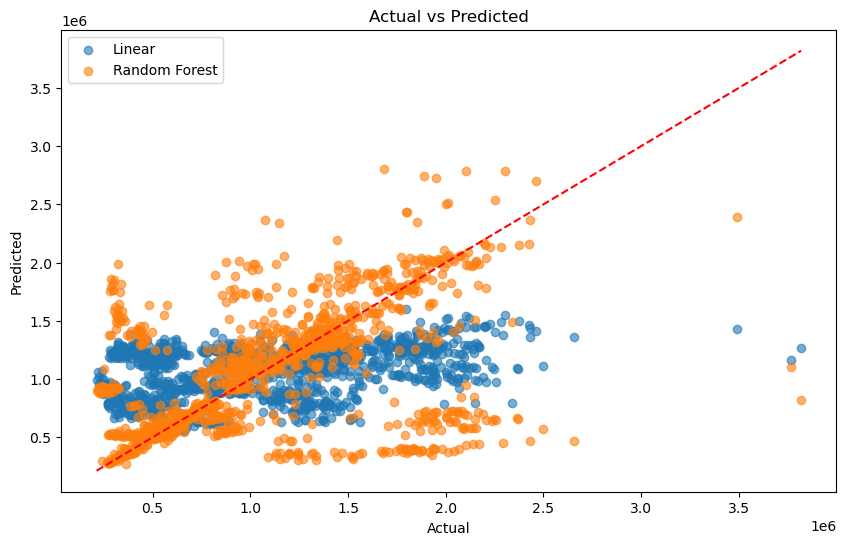

In [84]:

plt.figure(figsize=(10,6))
plt.scatter(y_test, lr.predict(X_test_scaled), label='Linear', alpha=0.6)
plt.scatter(y_test, rf.predict(X_test_scaled), label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()
